In [413]:
import numpy as np
import pandas as pd

In [414]:
df = pd.read_csv(r"C:\Users\Ritish Garg\Desktop\Olympics\athlete_events.csv")
region_df = pd.read_csv(r"C:\Users\Ritish Garg\Desktop\Olympics\noc_regions.csv")

In [415]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [416]:
df.shape

(271116, 15)

In [417]:
# Filtering the dataframe acc to season as want only summer olympics data
df = df[df['Season'] == 'Summer']

In [418]:
df.shape

(222552, 15)

In [419]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [420]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [421]:
# Extracting region i.e., country name using NOC (performing left join similar to SQL joins)
df = df.merge(region_df, on = 'NOC', how = 'left')

In [422]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [423]:
# Total countries participated and their total no.
df['region'].unique().shape

(206,)

In [424]:
# Checking the no. of missing and duplicate values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [425]:
df.duplicated().sum()

1385

In [426]:
# Removing duplicated rows
df.drop_duplicates(inplace = True)

In [427]:
df.duplicated().sum()

0

In [428]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [429]:
# One hot encoding on type of medals(separate columns for all 3)
# i.e., numeric representation for categories amd 2 columns to tell about 3rd column kinda
pd.get_dummies(df['Medal'], dtype = 'int')

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [430]:
df.shape

(221167, 17)

In [431]:
# Concatinating original df and the one-hot encoded df
# Vertical Stacking
df = pd.concat([df, pd.get_dummies(df['Medal'], dtype = 'int')], axis = 1)
# New Dataframe

In [432]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN,0,0,0


In [433]:
# Grouping on basis of NOC and then summing respective column up for total medals no.
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending = False).reset_index().head(25)

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
5,FRA,463,567,587
6,HUN,432,328,363
7,SWE,354,396,358
8,AUS,342,452,510
9,GDR,339,277,227


In [434]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

# Therefore, the above table that's grouped by NOC is incorrect since it has counted medals for team
# events for each player of that team the no. of times they have won for all regions. Implying
# team size * no of wins = addition of wrong medal number tally.

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [435]:
#Hence, to correct this, need to remove duplicate rows on the basis of Team, NOC, Games, Year, City,
# Sport, Event and probbly, Medal i.e., wherever theese column values will be same.

medal_tally = df.drop_duplicates(subset = ['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [436]:
medal_tally = medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending = False).reset_index()

In [437]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [438]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [439]:
# The new data is still not correct due to some small +s and -s in no. of medals of some NOCs.
# This is due to the exceptions as shown/given on the wikipedia page of 120 yrs data. However, India 
# has the correct data after removing duplicates.

### Now, displaying the Medal Tally on the WEB APP(Code in PyCharm).

In [440]:
# The below years and country thing is done for the dropdown cells for choosing country and year in
# the web app under Medal Tally.

In [441]:
# Extraxting in which years olympics was played
years = df['Year'].unique().tolist()

In [442]:
years.sort()

In [444]:
# insert(position to inset at, what to insert)
years.insert(0, 'Overall')

In [445]:
years

['Overall',
 'Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [446]:
# Extracting countries i.e., by regions in similar fashion to years
country = np.unique(df['region'].dropna().values).tolist()

In [447]:
country.sort()

In [448]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [449]:
country.insert(0, 'Overall')

In [450]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [451]:
# Creating a function having inputs year and country, and will show the output on the app after the
# selected inputs from dropdown box on the app.
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset = ['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    # Flag set for showing year-wise medals for a specific country
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year !='Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year', ascending = True).reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending = False).reset_index()
    
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)
    

In [452]:
fetch_medal_tally(df, year = 'Overall', country = 'India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


## Overall Analysis
- No. of editions
- No. of cities
- No. of events/sports
- No. of athletes
- Participating nations

In [453]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [454]:
# No. of editions/olympics held
df['Year'].unique().shape[0] - 1 # Due to 1906 Athens olympics not considered as olympics

28

In [455]:
# No. of cities held in
df['City'].unique().shape

(23,)

In [456]:
# No. of sports played
df['Sport'].unique().shape # This no changes since additions and subtractions of sports happen oftenly.

(52,)

In [457]:
# No. of events held
df['Event'].unique().shape # Many diff events for a single sport

(651,)

In [458]:
# No. of athletes participating
df['Name'].unique().shape

(116122,)

In [459]:
# No. of participating nations
df['region'].unique().shape # This no has historical influence as many nations combined and all

(206,)

### Graph Plots using Plotly

In [460]:
# Participating nations over time
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [461]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')

In [462]:
nations_over_time.rename(columns = {'count' : 'No. of participated nations', 'Year' : 'Year/Edition'}, inplace = True)

In [463]:
# Import the necessary plotly library
import plotly.express as px

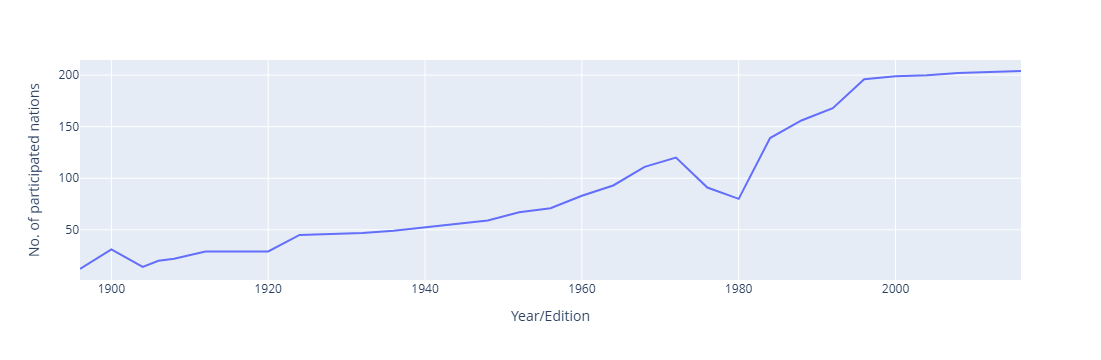

In [464]:
# Line plot of nations_over_time
fig = px.line(nations_over_time, x = 'Year/Edition', y = 'No. of participated nations')
fig.show()

In [465]:
# No. of events held over the time/years
events_over_time = df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')

In [466]:
events_over_time.rename(columns = {'count' : 'No. of Events held', 'Year' : 'Year/Edition'}, inplace = True)

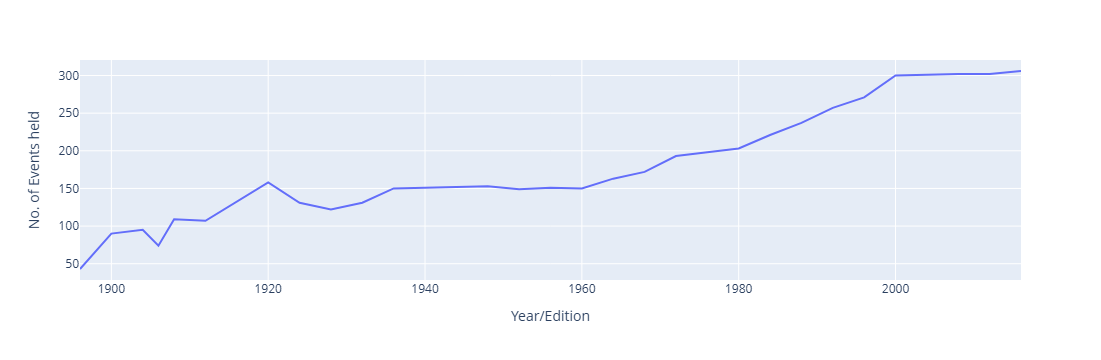

In [467]:
fig = px.line(events_over_time, x = 'Year/Edition', y = 'No. of Events held')
fig.show()

In [468]:
# No. of athletes over time
athlete_over_time = df.drop_duplicates(['Year', 'Name'])['Year'].value_counts().reset_index().sort_values('Year')

In [469]:
athlete_over_time.rename(columns = {'count' : 'No. of Athletes participated', 'Year' : 'Year/Edition'}, inplace = True)

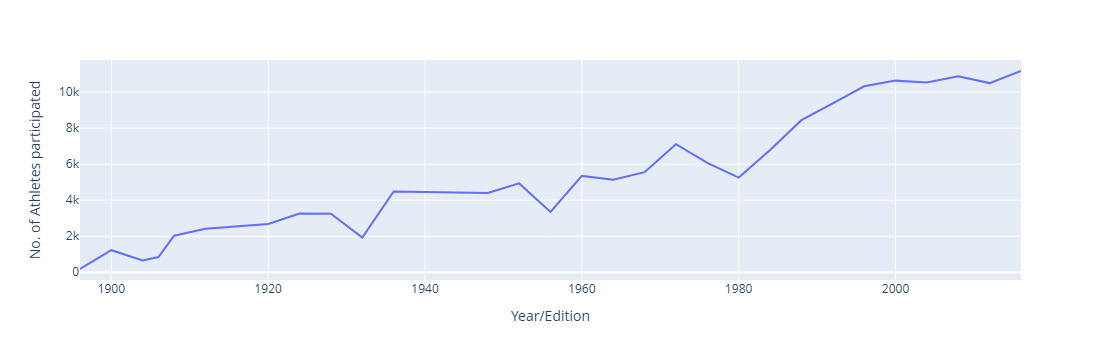

In [470]:
fig = px.line(athlete_over_time, x = 'Year/Edition', y = 'No. of Athletes participated')
fig.show()

In [471]:
# Importing seaborn for heatmap
import seaborn as sns
import matplotlib.pyplot as plt

In [472]:
# Heatmap for each sport, how many events were held over the years
x = df.drop_duplicates(['Year', 'Sport', 'Event'])

In [473]:
hm = x.pivot_table(index = 'Sport',columns = 'Year',values = 'Event', aggfunc = 'count').fillna(0).astype('int')

<Axes: xlabel='Year', ylabel='Sport'>

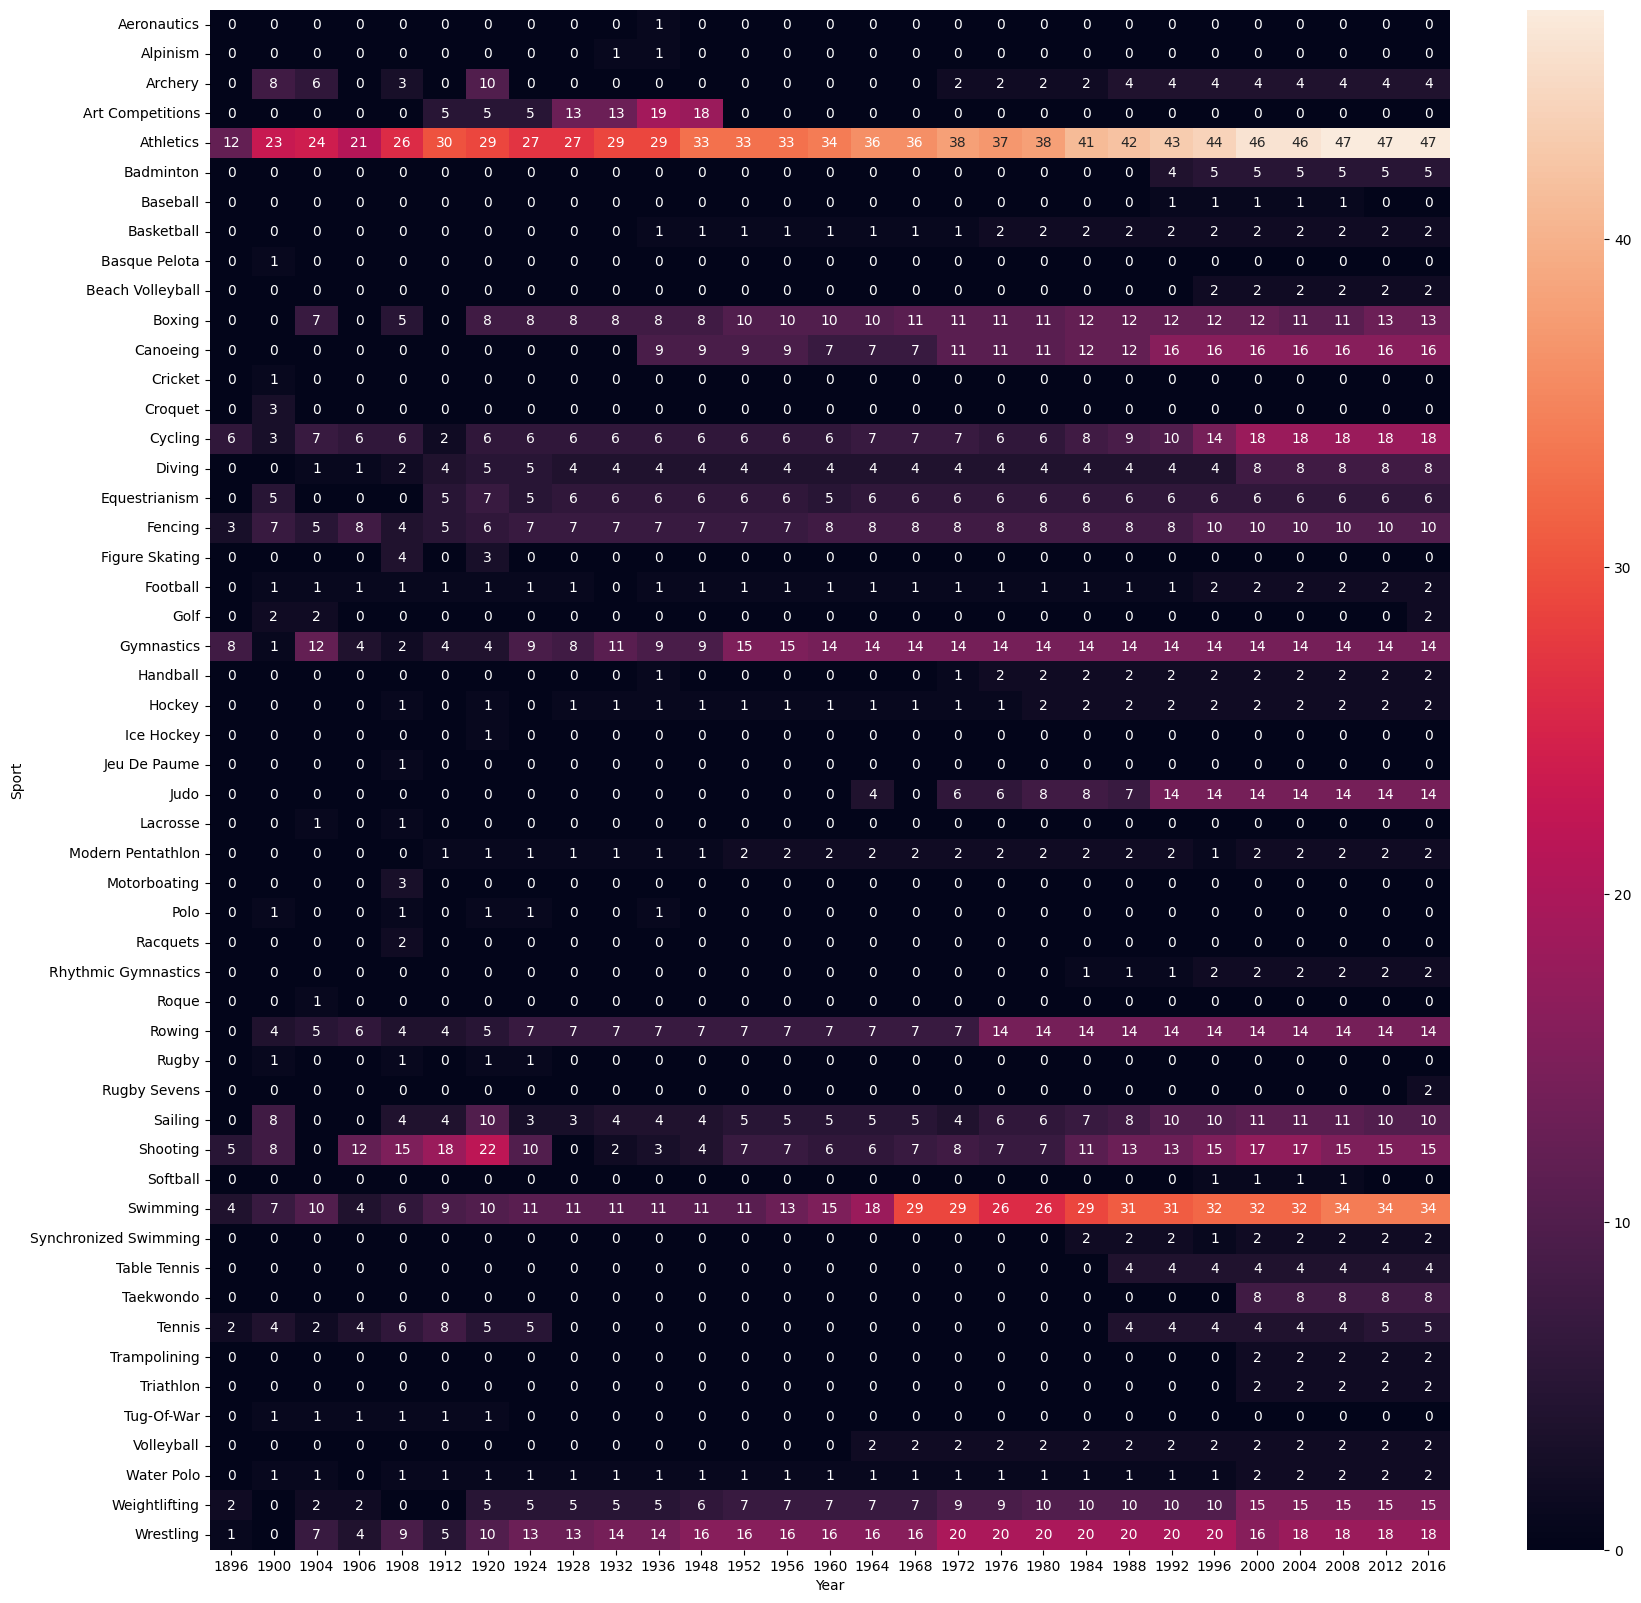

In [474]:
plt.figure(figsize = (20, 20))
sns.heatmap(hm, annot = True)

In [475]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [476]:
# Table of the most decorated/successful athletes i.e., athletes with most medal wins
def most_successful(df, sport):
     # Done snce many values in Medal column are NaN values
     temp_df = df.dropna(subset = ['Medal'])
     if sport != 'Overall':
         temp_df = temp_df[temp_df['Sport'] == sport]
     # Becomes/converts to a dataframe when reset_index() is used.
     x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on = 'Name', right_on = 'Name', how = 'left')[['Name', 'count', 'Sport', 'region']].drop_duplicates('Name')
     x.rename(columns = {'Name' : 'Name', 'count' : 'Medals'}, inplace = True)
     return x

In [477]:
most_successful(df, 'Gymnastics')

,Name,Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
161,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
179,gnes Keleti-Srkny (Klein),10,Gymnastics,Hungary
193,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia


## Country-wise
- Countrywise medal tally per year(line plot)
- What countries are good at heatmap
- Most successful athletes(Top 10)

In [479]:
# Q1.
temp_df = df.dropna(subset = 'Medal')
# Solving team sports problem
temp_df.drop_duplicates(subset = ['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace = True)

In [480]:
new_df = temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

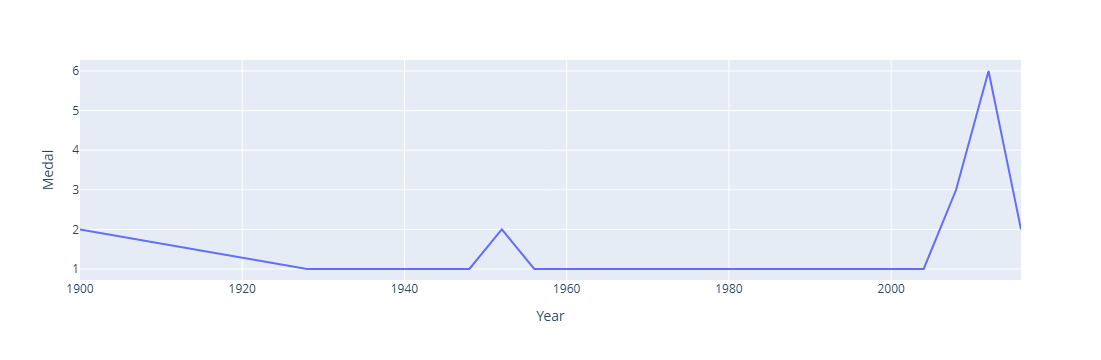

In [481]:
fig = px.line(final_df, x = 'Year', y = 'Medal')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

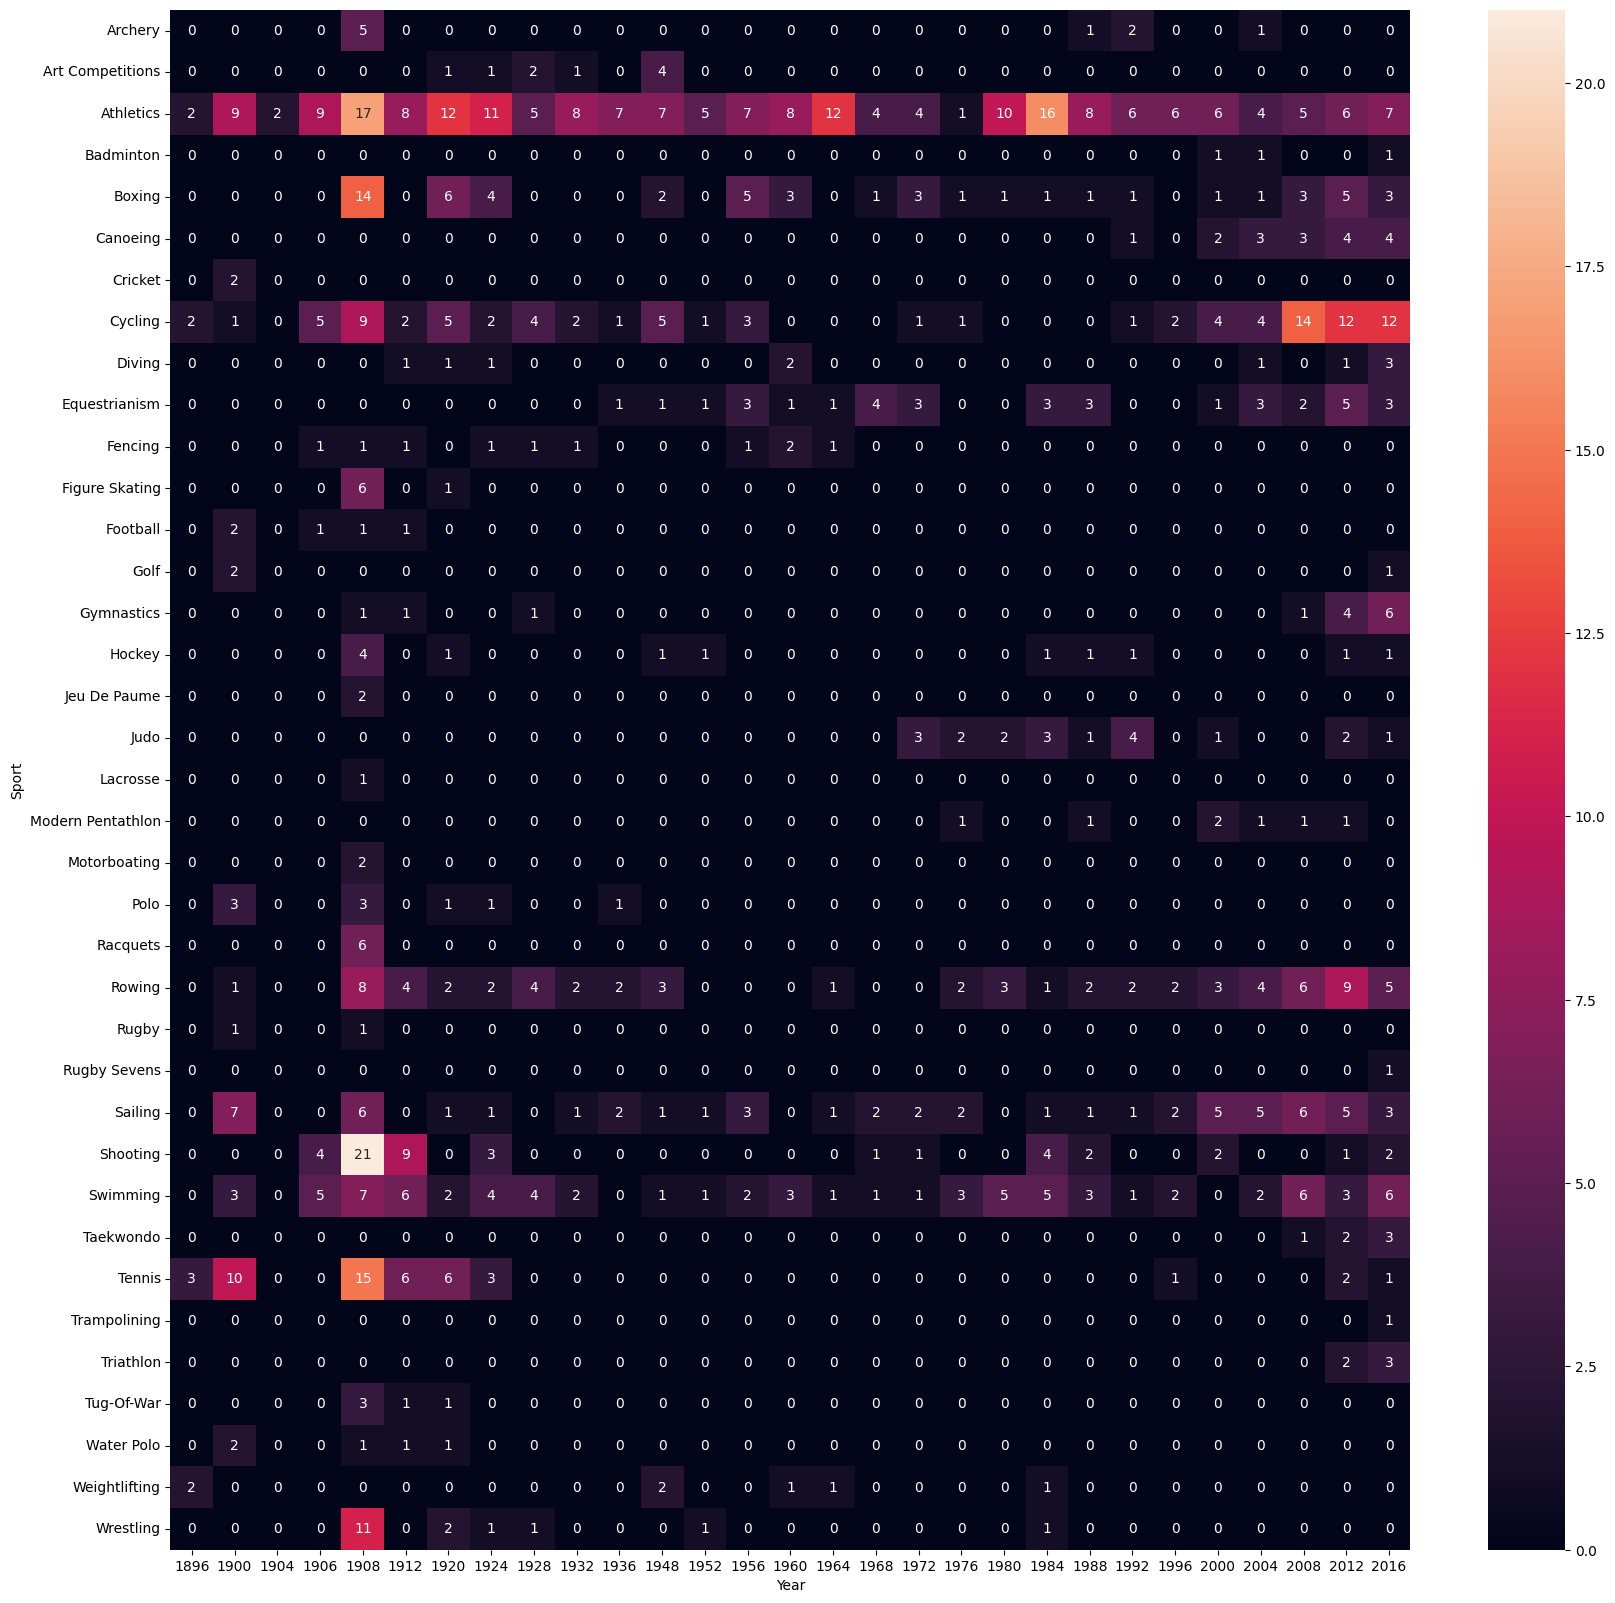

In [482]:
# Q2.
new_df = temp_df[temp_df['region'] == 'UK']
pt = new_df.pivot_table(index = 'Sport', columns = 'Year', values = 'Medal', aggfunc = 'count').fillna(0)
plt.figure(figsize = (20, 20))
sns.heatmap(pt, annot = True)

In [484]:
# Q3.
def most_successful(df, country):
     # Done since many values in Medal column are NaN values
     temp_df = df.dropna(subset = ['Medal'])
    
     temp_df = temp_df[temp_df['region'] == country]
     # Becomes/converts to a dataframe when reset_index() is used.
     x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on = 'Name', right_on = 'Name', how = 'left')[['Name', 'count', 'Sport']].drop_duplicates('Name')
     x.rename(columns = {'Name' : 'Name', 'count' : 'Medals'}, inplace = True)
     return x

In [485]:
most_successful(df, 'Jamaica')

,Name,Medals,Sport
0,Merlene Joyce Ottey-Page,9,Athletics
19,Veronica Angella Campbell-Brown,8,Athletics
30,Usain St. Leo Bolt,8,Athletics
40,Shelly-Ann Fraser-Pryce,6,Athletics
47,"Donald O'Reilly ""Don"" Quarrie",4,Athletics
56,"Herbert Henry ""Herb"" McKenley",4,Athletics
62,Arthur Stanley Wint,4,Athletics
68,Novlene Hilaire Williams-Mills,4,Athletics
75,Yohan Blake,4,Athletics
81,Sherone Anmarica Simpson,3,Athletics


## Athlete-wise Analysis

In [486]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [487]:
# Importing the necessary library for plotting graphs using plotly
import plotly.figure_factory as ff

In [488]:
# Dropping duplicates in Name and region since the same athlete may have played in many olympics
athlete_df = df.drop_duplicates(subset = ['Name', 'region'])

In [489]:
# Plotting curve for specific medal winning athletes
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

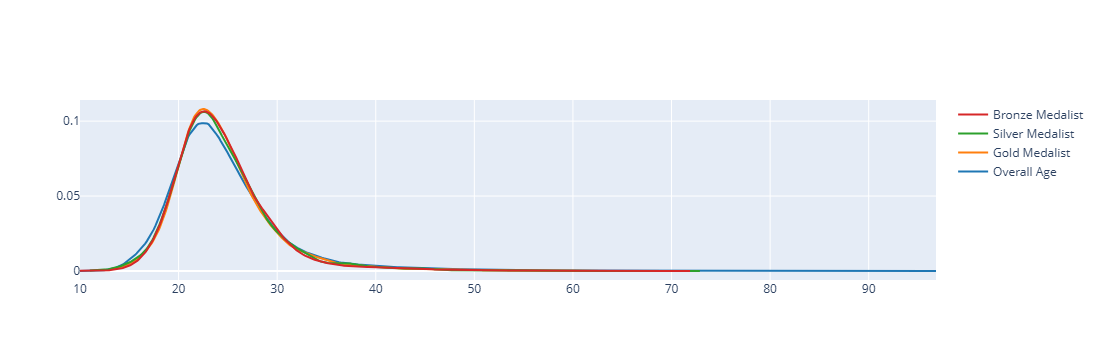

In [490]:
# Distribution plot over the Age column of diff medal-winning athletes
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist',
                                            'Bronze Medalist'], show_hist = False, show_rug = False)
fig.show()

In [491]:
# Plotting distribution of Age w.r.t. each sport
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Shooting', 'Boxing',
       'Taekwondo', 'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Golf',
       'Softball', 'Archery', 'Volleyball', 'Synchronized Swimming',
       'Table Tennis', 'Baseball', 'Rhythmic Gymnastics', 'Rugby Sevens',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [492]:
x = []
name = []
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

In [493]:
fig = ff.create_distplot(x, name, show_hist = False, show_rug = False)

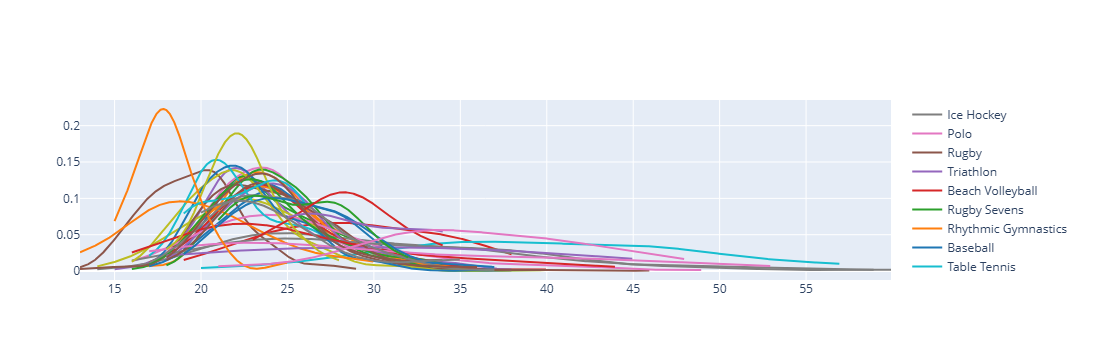

In [494]:
fig.show()

In [495]:
# Plotting a graph for any particular sport of Height v/s Weight
athlete_df.fillna({'Medal' : 'No Medal'}, inplace = True)

<Axes: xlabel='Weight', ylabel='Height'>

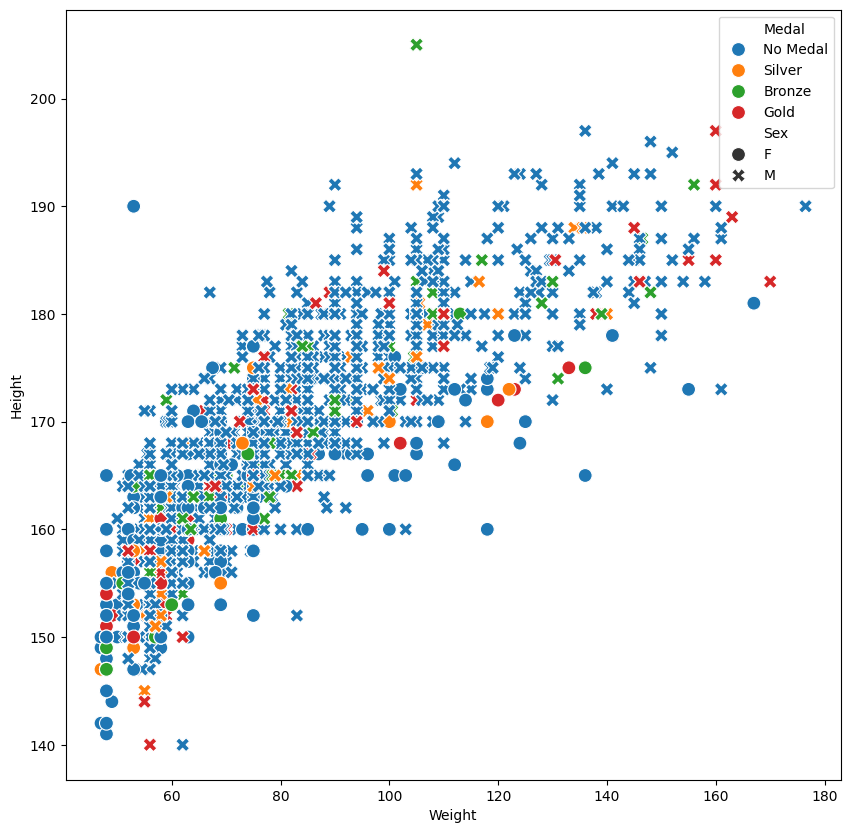

In [496]:
plt.figure(figsize = (10, 10))
temp_df = athlete_df[athlete_df['Sport'] == 'Weightlifting']
sns.scatterplot(x = temp_df['Weight'], y = temp_df['Height'], hue = temp_df['Medal'], style = temp_df['Sex'], s = 100)

In [497]:
# Plot of men vs women participation over the years in the Olympics
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [498]:
final = men.merge(women, on = 'Year', how = 'left')
final.rename(columns = {'Name_x' : 'Male', 'Name_y' : 'Female'}, inplace = True)

In [499]:
final.fillna(0, inplace = True)

In [500]:
fig = px.line(final, x = 'Year', y = ['Male', 'Female'])

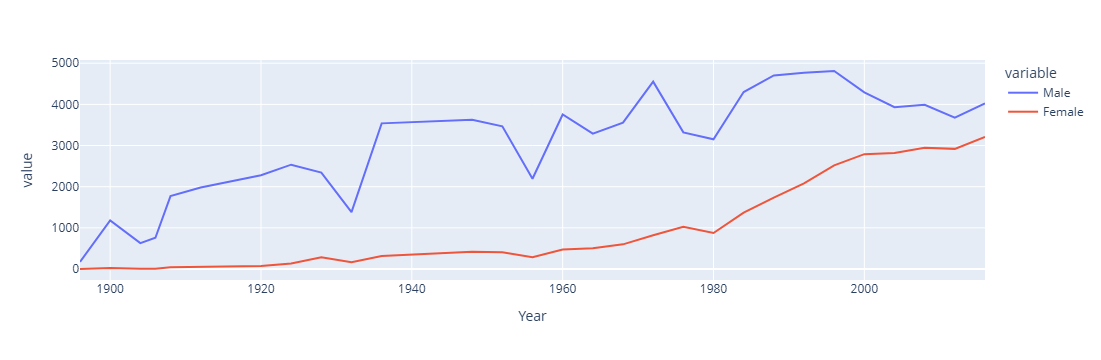

In [501]:
fig.show()